<a href="https://colab.research.google.com/github/ZynTran/Yolo/blob/main/CCCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas openpyxl

In [ ]:
pip install pytesseract

In [ ]:
from PIL import Image
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os

!sudo apt install tesseract-ocr-vie
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-vie
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 417 kB of archives.
After this operation, 546 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-vie all 1:4.00~git30-7274cfa-1.1 [417 kB]
Fetched 417 kB in 2s (253 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-vie.
(Reading database

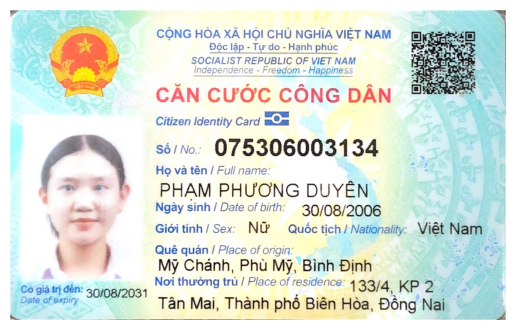

Đã lưu thông tin vào Excel: /content/thong_tin_cccd.xlsx


In [ ]:
from PIL import Image
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import re

filename = "/content/CCCD.jpg"

img = plt.imread(filename)
plt.imshow(img)
plt.axis('off')
plt.show()

img1 = np.array(Image.open(filename))
text = pytesseract.image_to_string(img1, lang='vie')  # Dùng tiếng Việt

lines = text.split('\n')
lines = [line.strip() for line in lines if line.strip()]

full_text = " ".join(lines).lower()

info = {
    'Họ và tên': None,
    'Ngày sinh': None,
    'Giới tính': None,
    'Quốc tịch': None,
    'Số CCCD': None,
    'Quê quán': None,
    'Nơi thường trú': None
}

match_cccd = re.search(r'\b\d{12}\b', full_text)
if match_cccd:
    info['Số CCCD'] = match_cccd.group()

# Họ tên
for i, line in enumerate(lines):
    if "họ và tên" in line.lower():
        if i + 1 < len(lines):
            info['Họ và tên'] = lines[i + 1].strip()
        break

# Ngày sinh: định dạng dd/mm/yyyy
match_dob = re.search(r'\b\d{2}/\d{2}/\d{4}\b', full_text)
if match_dob:
    info['Ngày sinh'] = match_dob.group()

# Giới tính
for line in lines:
    if "giới tính" in line.lower():
        parts = line.lower().split()
        for p in parts:
            if p in ['nam', 'nữ']:
                info['Giới tính'] = p.capitalize()
        break

# Quốc tịch
for line in lines:
    if "quốc tịch" in line.lower():
        info['Quốc tịch'] = line.split(":")[-1].strip().capitalize()
        break

# Quê quán
for i, line in enumerate(lines):
    if "quê quán" in line.lower():
        info['Quê quán'] = lines[i+1] if i+1 < len(lines) else None
        break

# Nơi thường trú
for i, line in enumerate(lines):
    if "nơi thường trú" in line.lower():
        info['Nơi thường trú'] = lines[i+1] if i+1 < len(lines) else None
        break

# ---------- Ghi vào file Excel ----------
df = pd.DataFrame([info])
output_file = "/content/thong_tin_cccd.xlsx"
df.to_excel(output_file, index=False)
print(f"Đã lưu thông tin vào Excel: {output_file}")